## Подготовка данных и загрузка библиотек

Произведем импорт необходимых библиотек для работы и настройки визуализаций, а также их отображении непосредственно в файлах формата .ipynb:

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
%matplotlib inline

Создаем датафрейм из csv файла с данными об оттоке клиентов и отображаем первые 30 строк таблицы:

In [112]:
churn_table = pd.read_csv('C:\IDE2\SF_DS\PY\Bank clients\churn.csv')
churn_table.head(30)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Выводим сводную информацию о DataFrame:

In [113]:
churn_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Удалим стобец RowNumber:

In [114]:
churn_table = churn_table.drop(columns=['RowNumber'])

Преобразуем столбцы в категориальные:

In [115]:
churn_table['Exited'] = churn_table['Exited'].astype('category')
churn_table['HasCrCard'] = churn_table['HasCrCard'].astype('category')
churn_table['Gender'] = churn_table['Gender'].astype('category')
churn_table['Geography'] = churn_table['Geography'].astype('category')
churn_table['NumOfProducts'] = churn_table['NumOfProducts'].astype('category')
churn_table['IsActiveMember'] = churn_table['IsActiveMember'].astype('category')

### Задание № 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

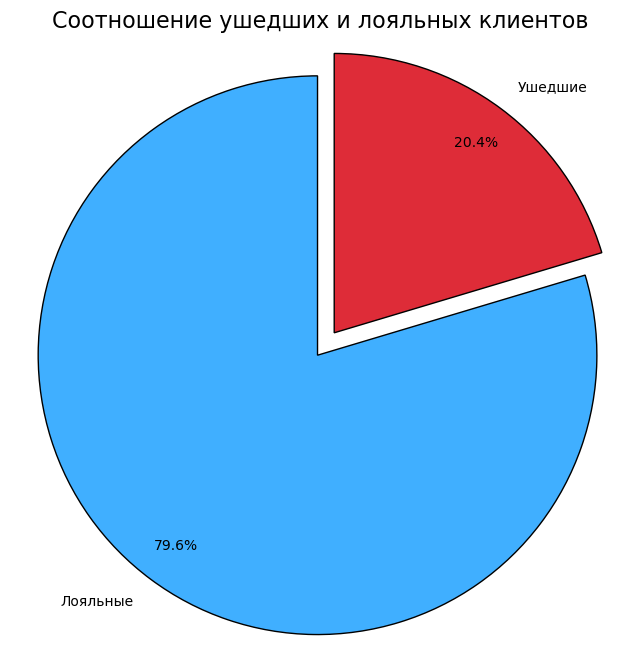

In [116]:
# Подсчет количества значений в столбце 'Exited'
exited_counts = churn_table['Exited'].value_counts()


# Создаем фигуру и один набор осей с размером 8x8 дюймов
fig, ax = plt.subplots(figsize=(8, 8))

# Задаем цвета для сегментов диаграммы
colors = [(0.251, 0.6863, 1), (0.87059, 0.17255, 0.2196)]

# Устанавливаем, что один из сегментов будет "выбит" наружу на 0.1
explode = (0.1, 0)

# Строим круговую диаграмму с данными exited_counts
ax.pie(
    exited_counts,  # данные для диаграммы
    labels=['Лояльные', 'Ушедшие'],  # метки сегментов
    autopct='%1.1f%%',  # формат отображения процентов
    startangle=90,  # начальный угол сегментов
    colors=colors,  # цвета сегментов
    explode=explode,  # настройка "выбитого" сегмента
    pctdistance=0.85,  # расстояние от центра до текста с процентами
    shadow=False,  # отсутствие тени
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # свойства границ сегментов
)

# Устанавливаем заголовок для диаграммы
ax.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)

# Убираем метку оси Y (не нужна для круговой диаграммы)
ax.set_ylabel('')

# Устанавливаем одинаковый масштаб осей для корректного отображения круга
ax.axis('equal')

# Отображаем график
plt.show()


<font color='dgreen'>**Вывод:**</font>
Согласно данных диаграммы, лояльных клиентов приблизительно в 4 раза больше, чем ушедших. Высокий процент лояльных клиентов (79,6%) по сравнению с ушедшими (20,4%) может свидетельствовать о хорошем уровне удовлетворенности клиентов и низком риске оттока, что делает банк привлекательным для инвестиций. 

### Задание № 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

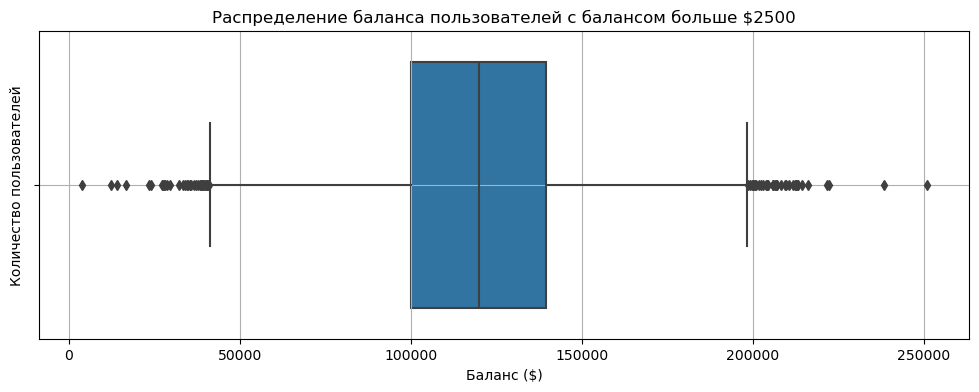

In [117]:
# Фильтрация данных в таблице churn_table для получения записей с балансом больше 2500 долларов
high_balance = churn_table[churn_table['Balance'] > 2500]

# Создание нового графика с размерами 12x4 дюйма
plt.figure(figsize=(12, 4))

# Построение диаграммы размаха (boxplot) для отображения распределения баланса
sns.boxplot(x=high_balance['Balance'])

# Включение сетки на графике для лучшей читаемости
plt.grid(True)

# Добавление заголовка к графику
plt.title('Распределение баланса пользователей с балансом больше $2500')

# Добавление подписи к оси X
plt.xlabel('Баланс ($)')

# Добавление подписи к оси Y
plt.ylabel('Количество пользователей')

# Отображение графика
plt.show()


Для помощи в анализе диграммы распределения баланса пользователей с балансом больше 2500 долларов, вычислим средний баланс, медиану и квантили.

In [118]:
# Вычисляем медиану баланса для записей, где баланс больше 2500, и округляем результат
median_balance = round(churn_table[churn_table['Balance'] > 2500]['Balance'].median())

# Вычисляем среднее значение баланса для записей, где баланс больше 2500, и округляем результат
mean_balance = round(churn_table[churn_table['Balance'] > 2500]['Balance'].mean())

# Выводим медиану баланса
print(f'Медиана баланса: {median_balance}')

# Выводим среднее значение баланса
print(f'Средний баланс: {mean_balance}')

Медиана баланса: 119840
Средний баланс: 119827


In [119]:
# Вычисляем первый квантиль (25-й процентиль) баланса для записей, где баланс больше 2500, и округляем результат
q1 = round(churn_table[churn_table['Balance'] > 2500]['Balance'].quantile(0.25))

# Вычисляем третий квантиль (75-й процентиль) баланса для записей, где баланс больше 2500, и округляем результат
q3 = round(churn_table[churn_table['Balance'] > 2500]['Balance'].quantile(0.75))

# Выводим первый квантиль баланса
print(f"Первый квантиль: {q1}")

# Выводим третий квантиль баланса
print(f"Третий квантиль: {q3}")

Первый квантиль: 100182
Третий квантиль: 139512


<font color='dgreen'>**Вывод:**</font>
- Маленькая разница между медианой и средним балансом в вашей задаче указывает на то, что распределение балансов пользователей банка относительно симметрично, и нет значительных выбросов, которые могли бы сильно повлиять на среднее значение. Банк может использовать эти данные для разработки продуктов и услуг, ориентированных на “среднего” пользователя, так как большинство пользователей имеют баланс вокруг этой суммы.  
- Индекс IQR - разница между третьим и первым квартилями составляет 39330. Это позволяет оценить разброс значений в середине распределения. Чем больше IQR, тем больше разброс между значениями в этом интервале. В данном случае, IQR указывает на разницу между балансами пользователей в середине распределения. Это означает, что 50% пользователей имеют баланс между 100182 и 139512 долларов. Данная информация может помочь банку в понимании, какие суммы на счетах являются наиболее типичными для среднего клиента, и позволит разработать продукты или услуги, которые будут соответствовать потребностям этой группы. 

### Задание № 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



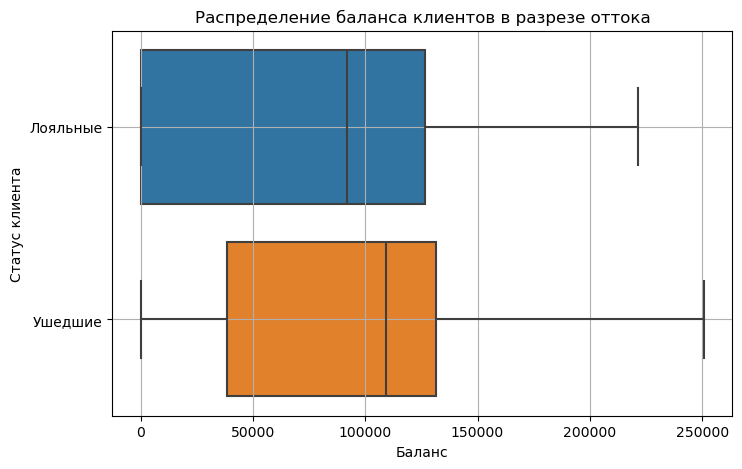

In [120]:
# Устанавливаем размер фигуры для графика (ширина, высота в дюймах)
plt.figure(figsize=(8, 5))

# Создаем boxplot, где по оси X отложен 'Balance', по оси Y - 'Exited', данные взяты из churn_table
sns.boxplot(x='Balance', y='Exited', data=churn_table)

# Включаем сетку на графике для лучшей читаемости
plt.grid(True)

# Задаем заголовок графика
plt.title('Распределение баланса клиентов в разрезе оттока')

# Подписываем ось X графика как 'Баланс'
plt.xlabel('Баланс')

# Подписываем ось Y графика как 'Статус клиента'
plt.ylabel('Статус клиента')

# Устанавливаем метки для оси Y: 0 - 'Лояльные', 1 - 'Ушедшие'
plt.yticks(ticks=[0, 1], labels=['Лояльные', 'Ушедшие'])

# Отображаем график
plt.show()


Для помощи в анализе диграммы распределение баланса клиента в разрезе признака оттока, вычислим медиану и квантили.

In [121]:
# Создаем Series для лояльных клиентов, выбирая балансы тех, кто не ушел (Exited == 0)
loyal_clients = churn_table[churn_table['Exited'] == 0]['Balance']

# Создаем Series для ушедших клиентов, выбирая балансы тех, кто ушел (Exited == 1)
churned_clients = churn_table[churn_table['Exited'] == 1]['Balance']

# Вычисляем квантили (25-й, 50-й и 75-й) для балансов лояльных клиентов
loyal_quantiles = loyal_clients.quantile([0.25, 0.5, 0.75])

# Вычисляем квантили (25-й, 50-й и 75-й) для балансов ушедших клиентов
churned_quantiles = churned_clients.quantile([0.25, 0.5, 0.75])

# Выводим результаты квантилей для лояльных клиентов
print(f"25-й, 50-й и 75-й квантили для лояльных клиентов:\n{loyal_quantiles}")

# Выводим результаты квантилей для ушедших клиентов
print(f"25-й, 50-й и 75-й квантили для ушедших клиентов:\n{churned_quantiles}")

25-й, 50-й и 75-й квантили для лояльных клиентов:
0.25         0.00
0.50     92072.68
0.75    126410.28
Name: Balance, dtype: float64
25-й, 50-й и 75-й квантили для ушедших клиентов:
0.25     38340.02
0.50    109349.29
0.75    131433.33
Name: Balance, dtype: float64


<font color='dgreen'>**Вывод:**</font>
На основе предоставленных данных можно сделать несколько наблюдений относительно различий в суммах на накопительных счетах ушедших и лояльных клиентов банка:

- Медианный баланс (50-й квантиль) у лояльных клиентов составляет 92,072.68, что меньше, чем у ушедших клиентов, у которых медианный баланс равен 109,349.29. Это может указывать на то, что клиенты с более высокими балансами склонны уходить из банка.  
- 25-й квантиль у лояльных клиентов равен 0.00, что говорит о том, что значительная доля лояльных клиентов имеет очень низкий или нулевой баланс, в то время как у ушедших клиентов этот показатель начинается с 38,340.02.  
- 75-й квантиль показывает, что у верхних 25% ушедших клиентов баланс выше, чем у лояльных клиентов (131,433.33 против 126,410.28). Эти различия могут быть связаны с несколькими факторами:  
  - **Тарифы и комиссии**: Высокие комиссии или невыгодные тарифы на обслуживание счетов могут быть причиной оттока клиентов с большими балансами.  
  - **Инвестиционная привлекательность**: Клиенты могут уходить из банка, если считают, что другие банки предлагают более выгодные условия для инвестирования или сохранения средств.  
  - **Услуги и обслуживание**: Недовольство качеством обслуживания, отсутствие персонализированных услуг или недостаточная поддержка могут также влиять на решение клиента уйти. 

### Задание № 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



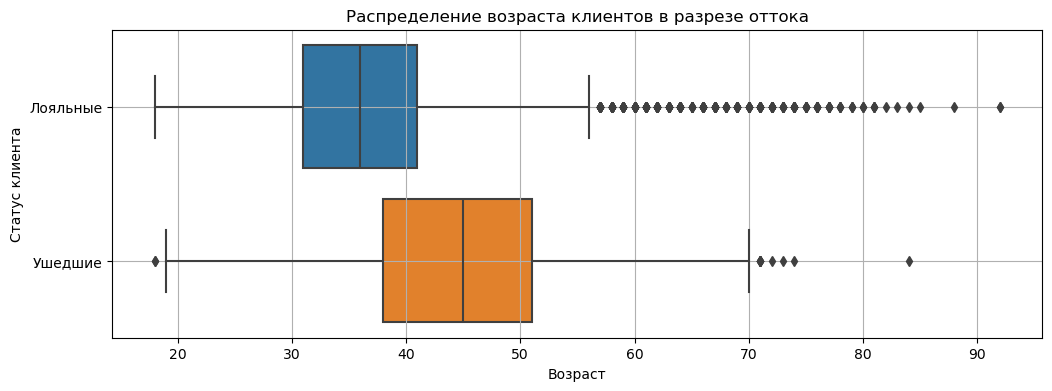

In [122]:
# Устанавливаем размер фигуры для графика (ширина, высота в дюймах)
plt.figure(figsize=(12, 4))

# Создаем boxplot, где по оси X отложен 'Age', по оси Y - 'Exited', данные взяты из churn_table
sns.boxplot(x='Age', y='Exited', data=churn_table)

# Включаем сетку на графике для лучшей читаемости
plt.grid(True)

# Задаем заголовок графика
plt.title('Распределение возраста клиентов в разрезе оттока')

# Подписываем ось X графика как 'Возраст'
plt.xlabel('Возраст')

# Подписываем ось Y графика как 'Статус клиента'
plt.ylabel('Статус клиента')

# Устанавливаем метки для оси Y: 0 - 'Лояльные', 1 - 'Ушедшие'
plt.yticks(ticks=[0, 1], labels=['Лояльные', 'Ушедшие'])

# Отображаем график
plt.show()


In [123]:
# Создаем Series для лояльных клиентов, выбирая возраст тех, кто не ушел (Exited == 0)
loyal_clients = churn_table[churn_table['Exited'] == 0]['Age']

# Создаем Series для ушедших клиентов, выбирая возраст тех, кто ушел (Exited == 1)
churned_clients = churn_table[churn_table['Exited'] == 1]['Age']

# Вычисляем квантили (25-й, 50-й и 75-й процентили) для возраста лояльных клиентов
loyal_quantiles = loyal_clients.quantile([0.25, 0.5, 0.75])

# Вычисляем квантили (25-й, 50-й и 75-й процентили) для возраста ушедших клиентов
churned_quantiles = churned_clients.quantile([0.25, 0.5, 0.75])

# Выводим результаты квантилей для лояльных клиентов
print(f"25-й, 50-й и 75-й квантили для лояльных клиентов:\n{loyal_quantiles}")

# Выводим результаты квантилей для ушедших клиентов
print(f"25-й, 50-й и 75-й квантили для ушедших клиентов:\n{churned_quantiles}")

25-й, 50-й и 75-й квантили для лояльных клиентов:
0.25    31.0
0.50    36.0
0.75    41.0
Name: Age, dtype: float64
25-й, 50-й и 75-й квантили для ушедших клиентов:
0.25    38.0
0.50    45.0
0.75    51.0
Name: Age, dtype: float64


<font color='dgreen'>**Вывод:**</font>
- **Основная группа лояльных клиентов**:
Медианный возраст лояльных клиентов составляет 36 лет (50-й квантиль). Это означает, что половина лояльных клиентов моложе 36 лет, а другая половина — старше. Большинство лояльных клиентов находятся в возрасте от 31 до 41 лет (между 25-м и 75-м квантилями).
- **Основная группа ушедших клиентов**:
Медианный возраст ушедших клиентов составляет 45 лет (50-й квантиль). Это означает, что половина ушедших клиентов моложе 45 лет, а другая половина — старше. Большинство ушедших клиентов находятся в возрасте от 38 до 51 лет (между 25-м и 75-м квантилями).
- **Выбросы среди лояльных клиентов**:
Возрастные выбросы среди лояльных клиентов, особенно в интервале от 55 до 95 лет, могут быть связаны с несколькими факторами:
  - **Долгосрочные отношения**: Старшие клиенты могут иметь долгосрочные отношения с банком, что делает их более лояльными. Они могли быть клиентами банка на протяжении многих лет, что способствует их удержанию.
  - **Финансовая стабильность**: Старшие клиенты могут иметь более стабильное финансовое положение, что также способствует их лояльности. Они могут иметь большие накопления или пенсионные счета, что делает их менее склонными к переходу в другой банк.
  - **Привычка и удобство**: Старшие клиенты могут быть привыкшими к определенным услугам и интерфейсу банка. Они могут предпочитать оставаться в знакомом окружении, даже если есть другие банки с более выгодными условиями.
  - **Доверие и репутация**: Старшие клиенты могут иметь большее доверие к банку, основанное на его репутации и долгой истории работы. 
- **Выбросы среди ушедших клиентов**: Небольшое количество выбросов у ушедших клиентов может быть связано с тем, что ушедшие клиенты могут быть более разнообразными по возрасту и не сосредотачиваются в определенных интервалах. Возможно, ушедшие клиенты в определенных возрастных интервалах имеют специфические потребности или причины для ухода, которые не характерны для других возрастных групп.
- **Выводы для банка**: Банку следует обратить внимание на клиентов в возрасте от 55 до 95 лет, так как они могут быть особенно лояльными. Исследование причин ухода у клиентов в возрасте с 38 до 51 и с 71 до 75 лет может помочь банку улучшить свои услуги и удерживать клиентов в этом возрастном диапазоне. Сравнение финансового положения и потребностей клиентов разных возрастов, может помочь банку разработать более целевые стратегии удержания.

### Задание № 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [124]:
# Цвет точек зависит от значения в столбце 'Exited'
fig = px.scatter(churn_table, x='CreditScore', y='EstimatedSalary', color='Exited',
                 title='Взаимосвязь кредитного рейтинга и предполагаемой зарплаты',
                 labels={'CreditScore': 'Кредитный рейтинг', 'EstimatedSalary': 'Предполагаемая зарплата'},
                 height=600, width=800) # Указание размеров окна графика

# Обновление макета графика, добавление заголовка к легенде и настройка её положения
fig.update_layout(legend_title_text='Статус ухода', 
                  legend=dict(
                      x=1.02, # Положение легенды по оси X (вне графика)
                      y=1,    # Положение легенды по оси Y (вверху)
                      traceorder="normal", # Порядок следования элементов в легенде
                      font=dict(
                          family="sans-serif", # Шрифт текста в легенде
                          size=12,            # Размер шрифта текста в легенде
                          color="black"       # Цвет шрифта текста в легенде
                      ),
                    ))

# Обновление свойств точек на графике, установка размера и цвета обводки
fig.update_traces(marker=dict(size=5, # Размер точек
                              line=dict(width=0.25, # Толщина обводки точек
                                        color='DarkSlateGrey'))) # Цвет обводки

# Обновление названий трассировок (групп точек) в зависимости от значения 'Exited'
# fig.for_each_trace() — это метод, который применяет функцию к каждой трассировке на графике.
# lambda trace: ... — это лямбда-функция, которая выполняется для каждой трассировки.
# trace.update(name=...) — обновляет свойство name трассировки, которое отображается в легенде графика.
# 'Ушедшие' if trace.name == '1' else 'Лояльные' — это условное выражение, которое устанавливает имя трассировки в ‘Ушедшие’, если значение trace.name равно ‘1’, и в ‘Лояльные’ в противном случае.
fig.for_each_trace(
    lambda trace: trace.update(name='Ушедшие' if trace.name == '1' else 'Лояльные')
)

# Добавление сетки на оси X и Y, настройка её вида
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Gray') # Сетка для оси X
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Gray') # Сетка для оси Y

# Отображение графика в интерактивном окне
fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<font color='dgreen'>**Вывод:**</font>
- Большинство клиентов банка как ушедших так и лояльных расположены в интервале кредитного рейтинга от 550 до 750. Максимальный кредитный рейтинг (850) - присвоен и лояльным и ушедшим клиентам. При значении кредитного ретинга ниже 400 отсутствуют лояльные клиенты, при этом большинство ушедших клинтов в данном диапазоне имеют среднюю и высокую предполагаемую зарплату.
- Кредитный рейтинг и лояльность: Высокий кредитный рейтинг лояльных клиентов может указывать на то, что банк успешно идентифицирует и вознаграждает клиентов с хорошей кредитной историей, что способствует их удержанию.
- Отток клиентов с высоким доходом: Уход клиентов с высоким уровнем дохода, но низким кредитным рейтингом, может быть связан с несколькими факторами:
  - **Политика кредитования**: Строгие условия кредитования могут привести к низкому рейтингу даже у клиентов с высоким доходом.
  - **Условия обслуживания**: Недостаточно гибкие условия обслуживания для клиентов с высоким доходом могут вызвать их недовольство и отток.
  - **Конкуренция**: Клиенты могут уходить в другие банки, предлагающие более выгодные условия или бонусы.
  - Распределение большинства клиентов в среднем диапазоне кредитного рейтинга может отражать общую кредитоспособность населения и/или маркетинговую стратегию банка, направленную на средний сегмент.

### Задание № 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

C:\Users\Администратор\AppData\Local\Temp\ipykernel_15140\164763431.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



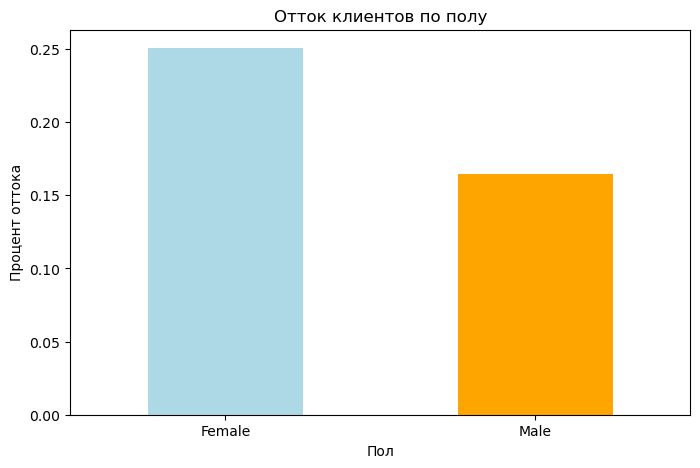

In [125]:
# Преобразование столбца 'Exited' в тип данных float
churn_table['Exited'] = churn_table['Exited'].astype(float)

# Группировка данных по полу и расчет среднего значения оттока
gender_exited = churn_table.groupby('Gender')['Exited'].mean()

# Определение цветов для диаграммы
colors = ['lightblue', 'orange']

# Создание фигуры для диаграммы с размером 8x5 дюймов
plt.figure(figsize=(8, 5))

# Построение столбчатой диаграммы с использованием ранее определенных цветов
gender_exited.plot(kind='bar', color=colors)

# Добавление заголовка диаграммы
plt.title('Отток клиентов по полу')

# Добавление подписи к оси X
plt.xlabel('Пол')

# Добавление подписи к оси Y
plt.ylabel('Процент оттока')

# Установка ориентации подписей категорий оси X в горизонтальное положение
plt.xticks(rotation=0)

# Отображение диаграммы
plt.show()



<font color='dgreen'>**Вывод:**</font>
По данным диаграммы фиксируется преобладающий отток клиентов женского пола. Более высокий отток среди женщин может быть связан с различиями в финансовых потребностях или предпочтениях в обслуживании, которые банк не удовлетворяет полностью. 

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму. 

C:\Users\Администратор\AppData\Local\Temp\ipykernel_15140\324283787.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



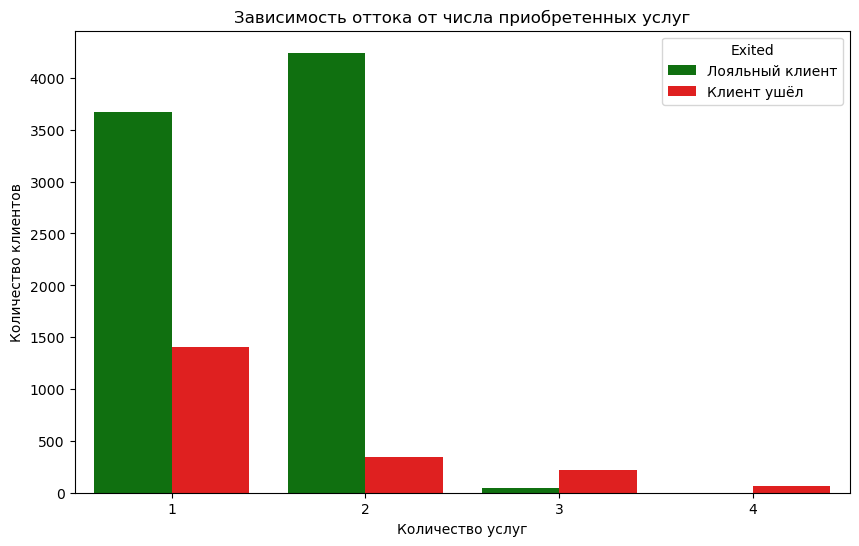

In [126]:
# Группировка данных по количеству продуктов и статусу ухода клиента, подсчет количества клиентов в каждой группе
grouped_row = churn_table.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

# Замена числовых значений столбца 'Exited' на текстовые обозначения
grouped_row['Exited'] = grouped_row['Exited'].map({1: 'Клиент ушёл', 0: 'Лояльный клиент'})

# Создание словаря для цветовой палитры, которая будет использоваться в диаграмме
palette_colors = {'Клиент ушёл': 'red', 'Лояльный клиент': 'green'}

# Установка размера фигуры для графика
plt.figure(figsize=(10, 6))

# Создание столбчатой диаграммы с использованием seaborn, где ось x - количество продуктов, y - количество клиентов, цвета определены выше
sns.barplot(x='NumOfProducts', y='CustomerId', hue='Exited', data=grouped_row, palette=palette_colors)

# Установка названия для оси x
plt.xlabel('Количество услуг')

# Установка названия для оси y
plt.ylabel('Количество клиентов')

# Установка заголовка для графика
plt.title('Зависимость оттока от числа приобретенных услуг')

# Отображение графика
plt.show()

<font color='dgreen'>**Вывод:**</font> Клиенты, пользующиеся только одной услугой, могут чувствовать меньшую привязанность к банку и легче переходить к конкурентам. Это может указывать на необходимость разработки более привлекательных пакетных предложений.
- **Недостаточное понимание ценности продукта**: Клиенты могут не видеть достаточной ценности в продукте или не понимать, как он может помочь им достичь их финансовых целей.
- **Отсутствие персонализации**: Банк может предлагать стандартные продукты, которые не соответствуют индивидуальным потребностям клиентов.
- **Недостаточная работа с клиентами**: Банк может не проводить эффективную работу по обучению клиентов и информированию их о преимуществах продуктов.
- **Негативный опыт обслуживания**: Плохой опыт обслуживания может оттолкнуть клиентов, даже если они используют только один продукт.

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

C:\Users\Администратор\AppData\Local\Temp\ipykernel_15140\2279144966.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



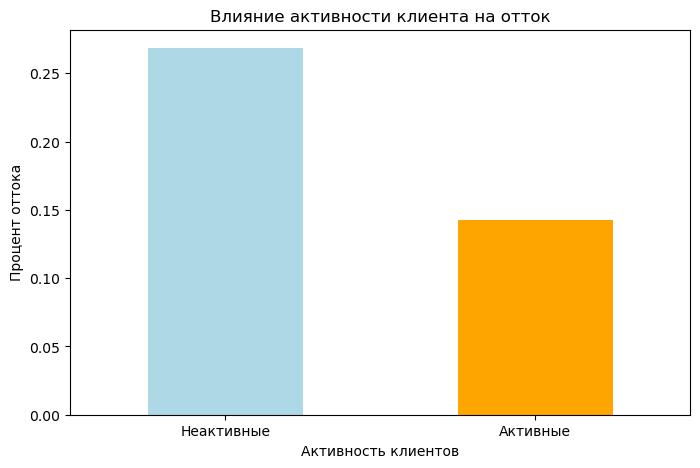

In [127]:
# Группировка данных по столбцу 'IsActiveMember' и вычисление среднего значения столбца 'Exited'
active_exited = churn_table.groupby('IsActiveMember')['Exited'].mean()

# Создание столбчатой диаграммы с использованием pandas, где ось x - активность клиентов, y - процент оттока
active_exited.plot(kind='bar', figsize=(8, 5), color=['lightblue', 'orange'])

# Установка заголовка для графика
plt.title('Влияние активности клиента на отток')

# Установка названия для оси x
plt.xlabel('Активность клиентов')

# Установка названия для оси y
plt.ylabel('Процент оттока')

# Установка подписей для значений на оси x
plt.xticks(ticks=[0, 1], labels=['Неактивные', 'Активные'], rotation=0)

# Отображение графика
plt.show()

<font color='dgreen'>**Вывод:**</font> На основе предоставленных данных, можно сделать вывод, что статус активного клиента значительно влияет на отток клиентов. Неактивных клиентов в два раза больше, чем активных. Активные клиенты, вероятно, чувствуют большую привязанность к банку и его услугам, что снижает вероятность их ухода. В то время как неактивные клиенты, возможно, не используют услуги банка в полной мере или не удовлетворены предоставляемым сервисом, что увеличивает риск их оттока. Чтобы уменьшить отток среди неактивных клиентов, можно рассмотреть следующие стратегии:
- Персонализированные предложения: Использовать данные о поведении клиентов для создания индивидуальных предложений, которые могут заинтересовать неактивных клиентов и побудить их к действию.
- Программы лояльности: Разработать программы лояльности, которые поощряют клиентов за использование различных услуг банка, например, начисление бонусных баллов или кэшбэк за транзакции.
- Улучшение обслуживания клиентов: Предоставить более высокий уровень обслуживания, включая персонального менеджера для клиентов, которые могут быть склонны к оттоку.
- Реклама и маркетинг: Провести рекламные семинары или вебинары, чтобы повысить финансовую грамотность клиентов и показать им, как они могут извлечь выгоду из полного спектра услуг банка. Запустить маркетинговые кампании, направленные на повышение активности клиентов, например, через социальные сети или email-рассылки.
- Обратная связь: Регулярно собирать обратную связь от клиентов для понимания их потребностей и проблем, а также для оперативного реагирования на их запросы.
- Улучшение продуктов и услуг: Анализировать данные о том, какие услуги наименее популярны среди неактивных клиентов, и работать над их улучшением или разработкой новых предложений.

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [128]:
# Группировка данных по столбцу 'Geography' и вычисление среднего значения столбца 'Exited'
churn_rate = churn_table.groupby('Geography', as_index=False)['Exited'].mean()

# Создание хороплет-карты с использованием библиотеки Plotly Express
fig = px.choropleth(
    churn_rate,
    locations='Geography',  # Указание столбца с географическими названиями
    locationmode='country names',  # Режим отображения географических названий
    color='Exited',  # Столбец, который будет определять цвет на карте
    range_color=[0, 0.5],  # Диапазон цветов
    hover_name='Geography',  # Название, которое будет отображаться при наведении
    color_continuous_scale=px.colors.sequential.Plasma,  # Палитра цветов для отображения данных
    title='Доля ушедших клиентов по странам'  # Заголовок карты
)

# Обновление параметров макета графика
fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),  # Отступы: слева, справа, сверху, снизу
    width=800,  # Ширина графика
    height=600  # Высота графика
)

# Обновление заголовка графика
fig.update_layout(
    title={
        'text': 'Доля ушедших клиентов по странам',  # Текст заголовка
        'y':0.9,  # Позиция заголовка по оси Y
        'x':0.5,  # Позиция заголовка по оси X
        'xanchor': 'center',  # Якорь заголовка по оси X
        'yanchor': 'top'  # Якорь заголовка по оси Y
    }
)

# Отображение графика
fig.show()

C:\Users\Администратор\AppData\Local\Temp\ipykernel_15140\76965072.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<font color='dgreen'>**Вывод:**</font> В Германии зафиксирован в два раза больший отток клиентов, чем во Франции и Испании. Вероятно, различия в оттоке клиентов между Германией, Францией и Испанией могут быть обусловлены несколькими факторами:
- Экономические условия в разных странах могут сильно влиять на поведение клиентов. Если экономика Германии более нестабильна или предоставляет меньше возможностей для клиентов, это может привести к большему оттоку.
- Уровень конкуренции среди банков в каждой из этих стран может различаться. Если в Германии есть более активная конкуренция, клиенты могут легче переходить к другим банкам. В случае Германии, Франции и Испании, различия в ВВП могут объяснить различия в оттоке клиентов. Например, если ВВП Германии выше, чем в Франции и Испании, это может указывать на более сильную экономику и большую конкуренцию среди банков, что, в свою очередь, может привести к большему оттоку клиентов, поскольку у них есть больше вариантов для выбора.
- Различия в регуляторной среде могут также влиять на отток клиентов. Разные страны могут иметь разные правила и законы, которые влияют на банковскую деятельность. Возможно, банки во Франции и Испании предоставляют более привлекательные услуги или имеют более эффективные стратегии удержания клиентов, более эффективно используют дейтсвующую законадательную базу в своей коммерческой деятельности.


### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Переведем числовой признак CreditScore в категориальный. Для этого воспользуемся функцией get_credit_score_cat(), которая приведена ниже. 

In [129]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [130]:
# Создание нового столбца 'CreditScoreCat', в котором значения определяются функцией get_credit_score_cat, примененной к столбцу 'CreditScore':
churn_table['CreditScoreCat'] = churn_table['CreditScore'].apply(get_credit_score_cat)

In [131]:
# Создание сводной таблицы (pivot table) с индексом 'CreditScoreCat', столбцами 'Tenure' и значениями 'Exited', вычисленными средним значением:
pivot_table = churn_table.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')

Построим тепловую картограмму, используя библиотеку Plotly Express, отображающую отток клиентов по кредитному рейтингу и сроку использования.

In [132]:
# Создание DataFrame для тепловой карты, где индексом является 'CreditScoreCat', столбцами - 'Tenure', а значениями - средние значения 'Exited'
heatmap_df = churn_table.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')

# Построение тепловой карты с использованием библиотеки Plotly Express
fig = px.imshow(
    heatmap_df,  # Данные для тепловой карты
    x=heatmap_df.columns,  # Названия столбцов для оси X
    y=heatmap_df.index,  # Названия индексов для оси Y
    color_continuous_scale='RdBu',  # Цветовая шкала для отображения значений
    zmin=0, zmax=0.5,  # Минимальное и максимальное значения цветовой шкалы
    labels={'x': 'Срок использования услуг (Tenure)', 'y': 'Кредитный рейтинг (CreditScoreCat)'},  # Подписи осей
    title='Тепловая карта оттока клиентов по кредитному рейтингу и сроку использования услуг'  # Заголовок карты
)

# Отображение тепловой карты
fig.show()


<font color='dgreen'>**Вывод:**</font> Клиенты с низким уровнем доходности, наиболее чаще покидают банк, чем с высоким. При этом среди низкодоходных клиентов, большая часть покидает банк пользовавшись услугами банка либо меньше года, либо 3, 4 года, либо 10 лет и более. Высокодохные клиенты покидают банк в течении первого года, либо при пользовании его услугами более 9 лет.
- **Для низкодоходных клиентов**:
  - **Первый год пользования услугами**: Новые клиенты могут уходить из-за недостаточного понимания услуг банка или из-за невыполнения ожиданий, связанных с обслуживанием или продуктами.
  - **3-4 года пользования услугами**: Возможно, это время, когда начальное предложение или акция заканчивается, и клиенты сталкиваются с повышенными тарифами или сборами.
  - **10 лет и более**: Долгосрочные клиенты могут уходить из-за изменений в личных финансовых обстоятельствах или из-за поиска более выгодных условий в других банках.
- **Для высокодоходных клиентов**:
  - **Первый год пользования услугами**: Высокодоходные клиенты могут иметь более высокие ожидания от банковских услуг и быстрее уходить, если банк не соответствует этим ожиданиям с самого начала.
  - **9 лет и более**: Возможно, что после длительного периода пользования услугами банка, высокодоходные клиенты ищут новые инвестиционные возможности или более персонализированные финансовые услуги, которые могут предложить другие банки или финансовые институты.
- **Лояльность клиентов с уровнем дохода средним и выше среднего** может быть обусловлена несколькими факторами: удовлетворенность услугами, финансовая стабильность, доступ к премиальным услугам. В отличие от высокодоходных клиентов, которые могут требовать более сложных финансовых услуг и могут уйти, если их потребности не удовлетворяются, и низкодоходных клиентов, которые могут быть более уязвимы к финансовым трудностям, клиенты с уровнем дохода средним и выше среднего могут находить оптимальный баланс между доступностью услуг и их качеством. Это делает их более лояльными и стабильными для банка.